# Credit Card Predictions

Antonio Debouse, Blake Freeman, Bodie Franklin, Eric Romero

# Business Understanding

Credit card companies are always in search of better ways to monitor borrowers to determine if the credit card borrower will default on their credit card payments or make them in full. Defaulted credit card payments are often difficult to recoup and create losses for these companies. Defaulting on a payment is defined as not meeting the debt obligation (which is the credit card payment). Our dataset is composed of 24 attributes and 30,000 records that reflect a Taiwanese credit card borrower’s payment history over a six month period.The data was pulled from UCI machine learning repository. The purpose of the dataset is to provide attributes at different points in their payment history to identify if a credit card borrower will default on their payments or pay in full. Since the dataset captures six payment periods, it gives the credit card firm a chance to identify if default will occur or not in various billing cycles.  The effectiveness of a good classification algorithm is one that produces strong accuracy, sensitivity, and specificity scores through cross validation. If an effective classification model can be built, the credit company will have the ability to proactively monitor borrowers in various credit stages.
The significance of identifying default or not will allow the credit card to minimize their losses. If early default identification occurs, the credit card company can reduce the borrower’s credit limits or preemptively work with the borrower to create new repayment plans. Both outcomes will help the credit company reduce their losses that would occur if no action were taken.  


# Data Meaning Type

In [181]:
#Imports 
import pandas as pd
#import plotly as py #gives error?
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


bank_db = 'C:/Users/blake/OneDrive/Desktop/MSDS 7331/Project1/Data/bank_dataset.csv'

# Data Quality 

The data that was pulled was fairly clean to start when reviewing this data. However we did notice some factors that were not in the defined range of the data. This was apparent in categorical columns of Education and Marriage. Education had 3 additional values of 0, 5, 6  which occurred 345 times out of the 30,000 values in this column. Marriage had a value of 0 which occurred 54 times out of the 30,000 values. We addressed both these mistakes in the data by adding them to the “other” column that is denoted in each category. We decided to include these variables since it looked like a misclassification of the data type. 

# Cleaning the Data

In [11]:
# Cleaning the Data on Unrepresented Variables
#Since both Education and Marrage have a others catagory we decided to include the vaules to in the other catagory since 
# We can not state the meaning of these.

bank_db_df['EDUCATION'] = bank_db_df['EDUCATION'].replace([0,5,6],4)


bank_db_df['MARRIAGE'] = bank_db_df['MARRIAGE'].replace([0],3)

#bank_db_df.EDUCATION.unique()
#bank_db_df.MARRIAGE.unique()

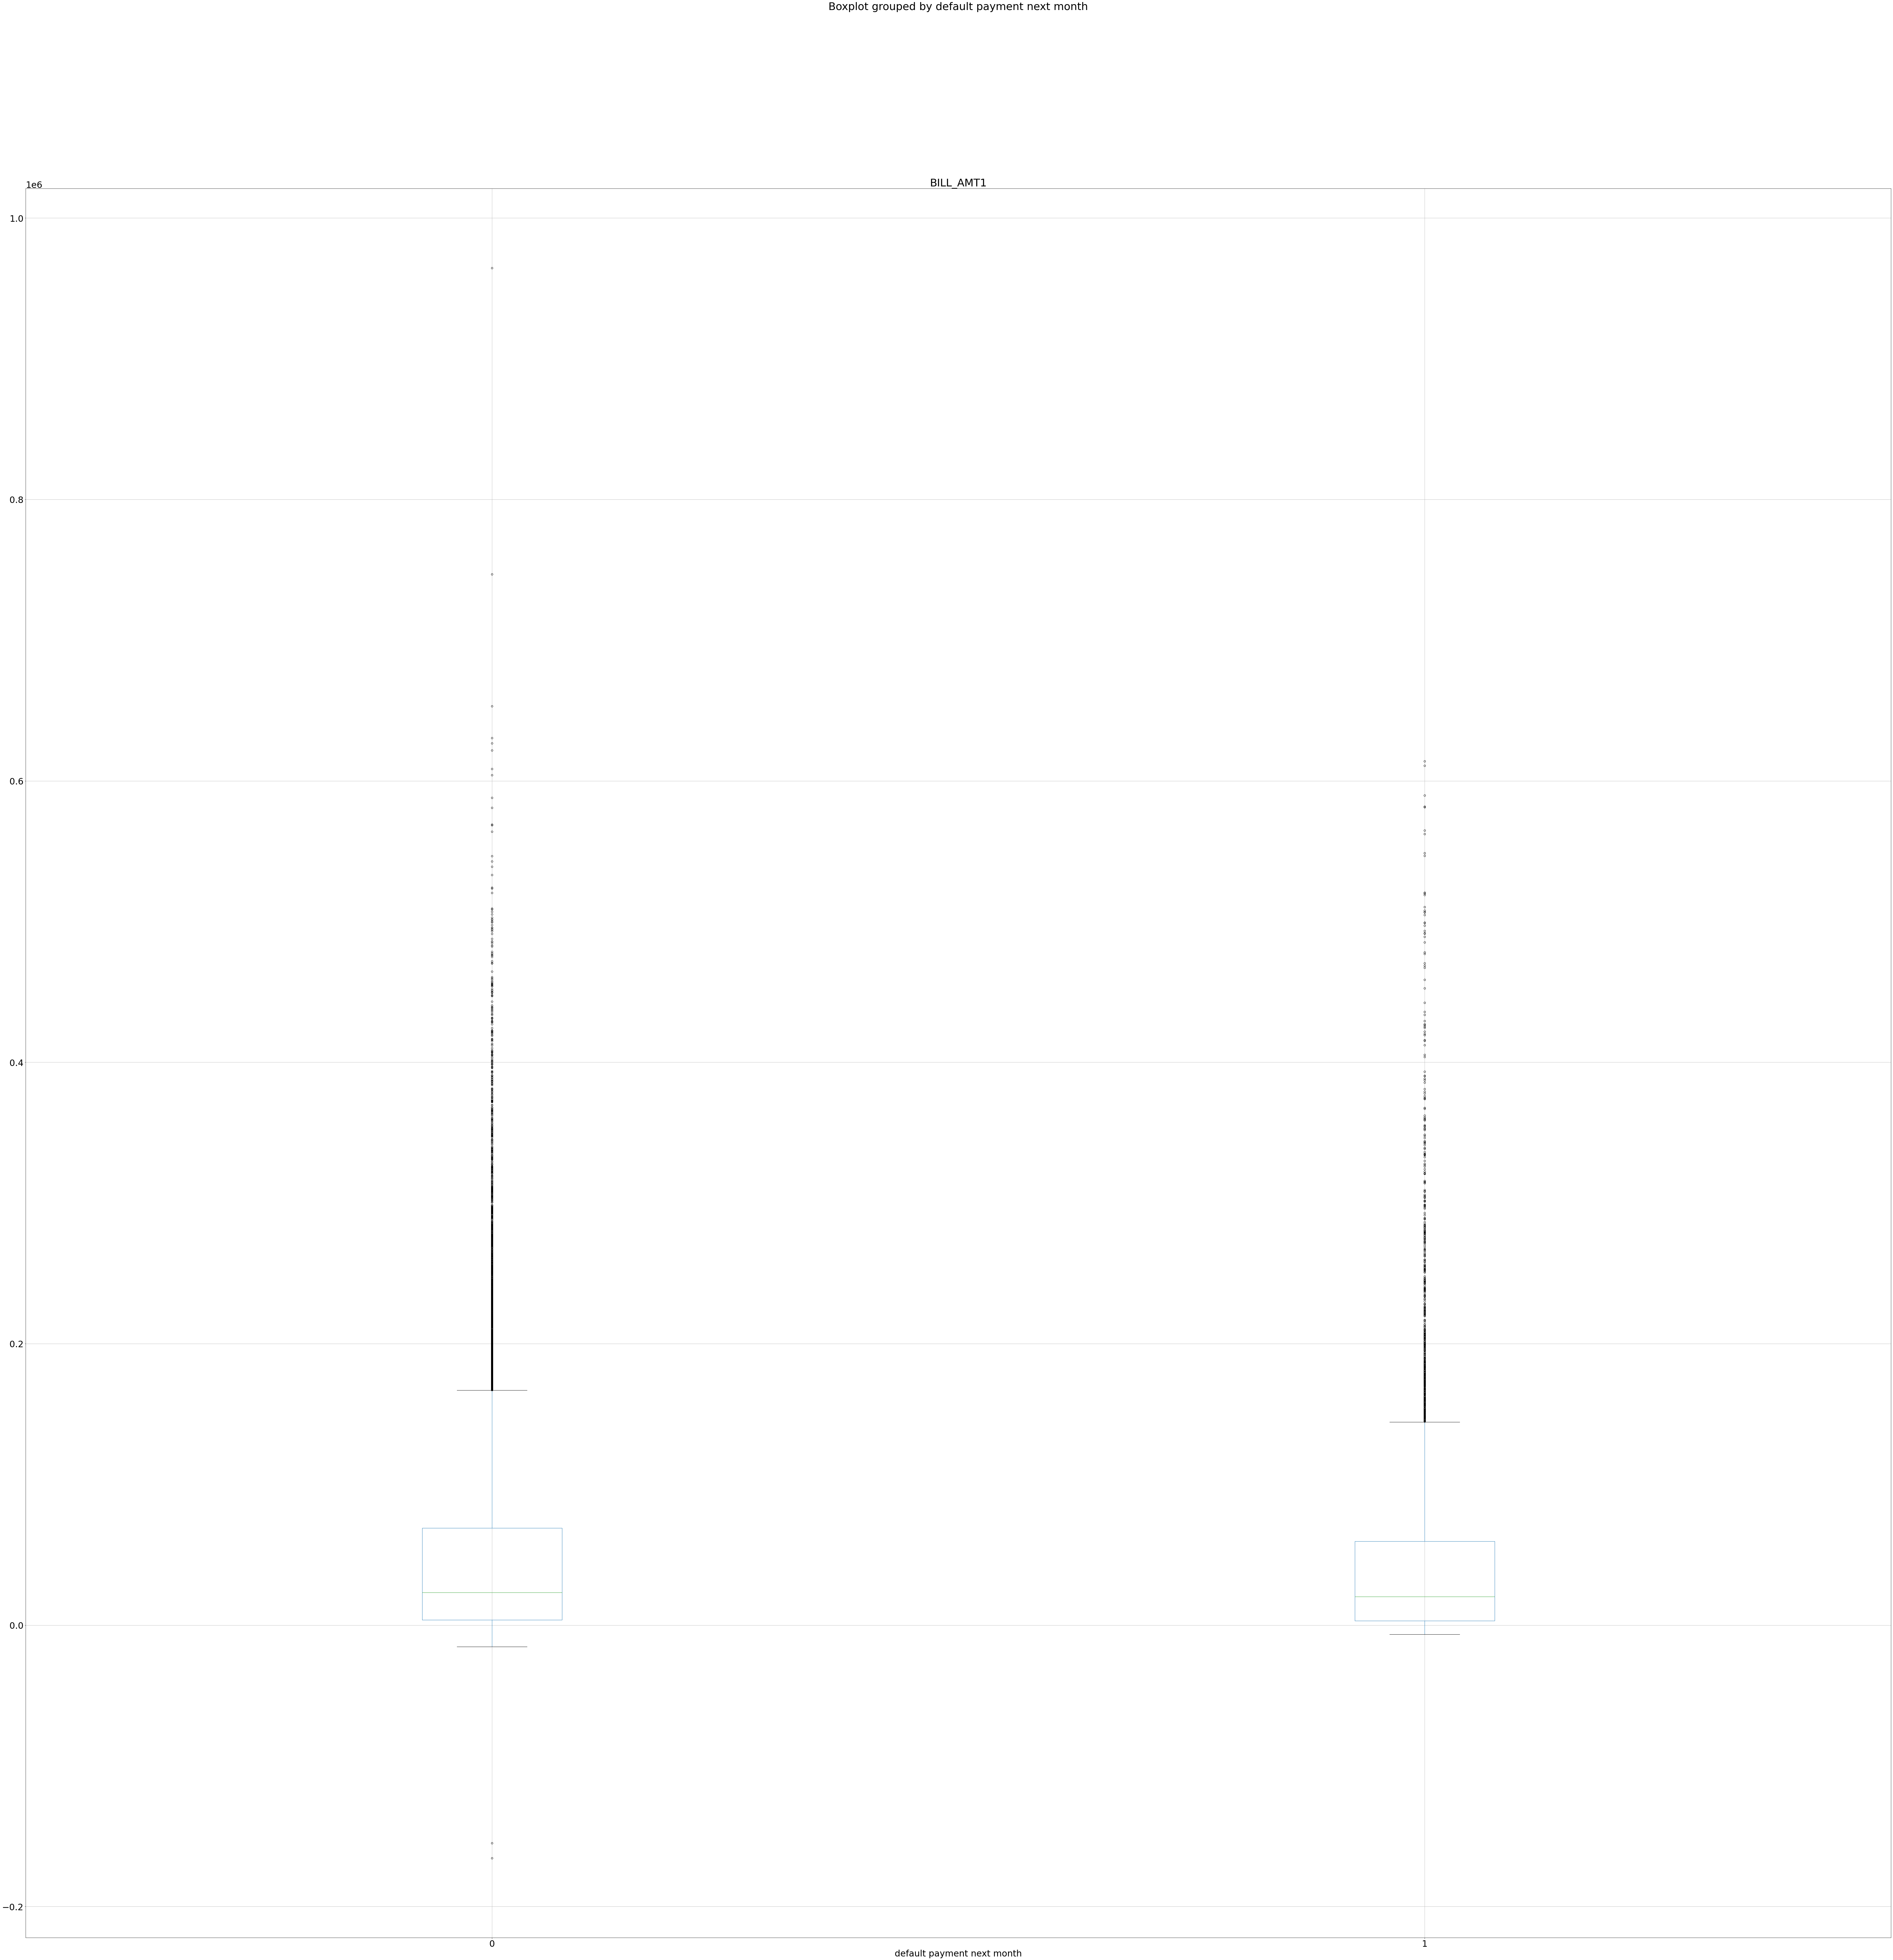

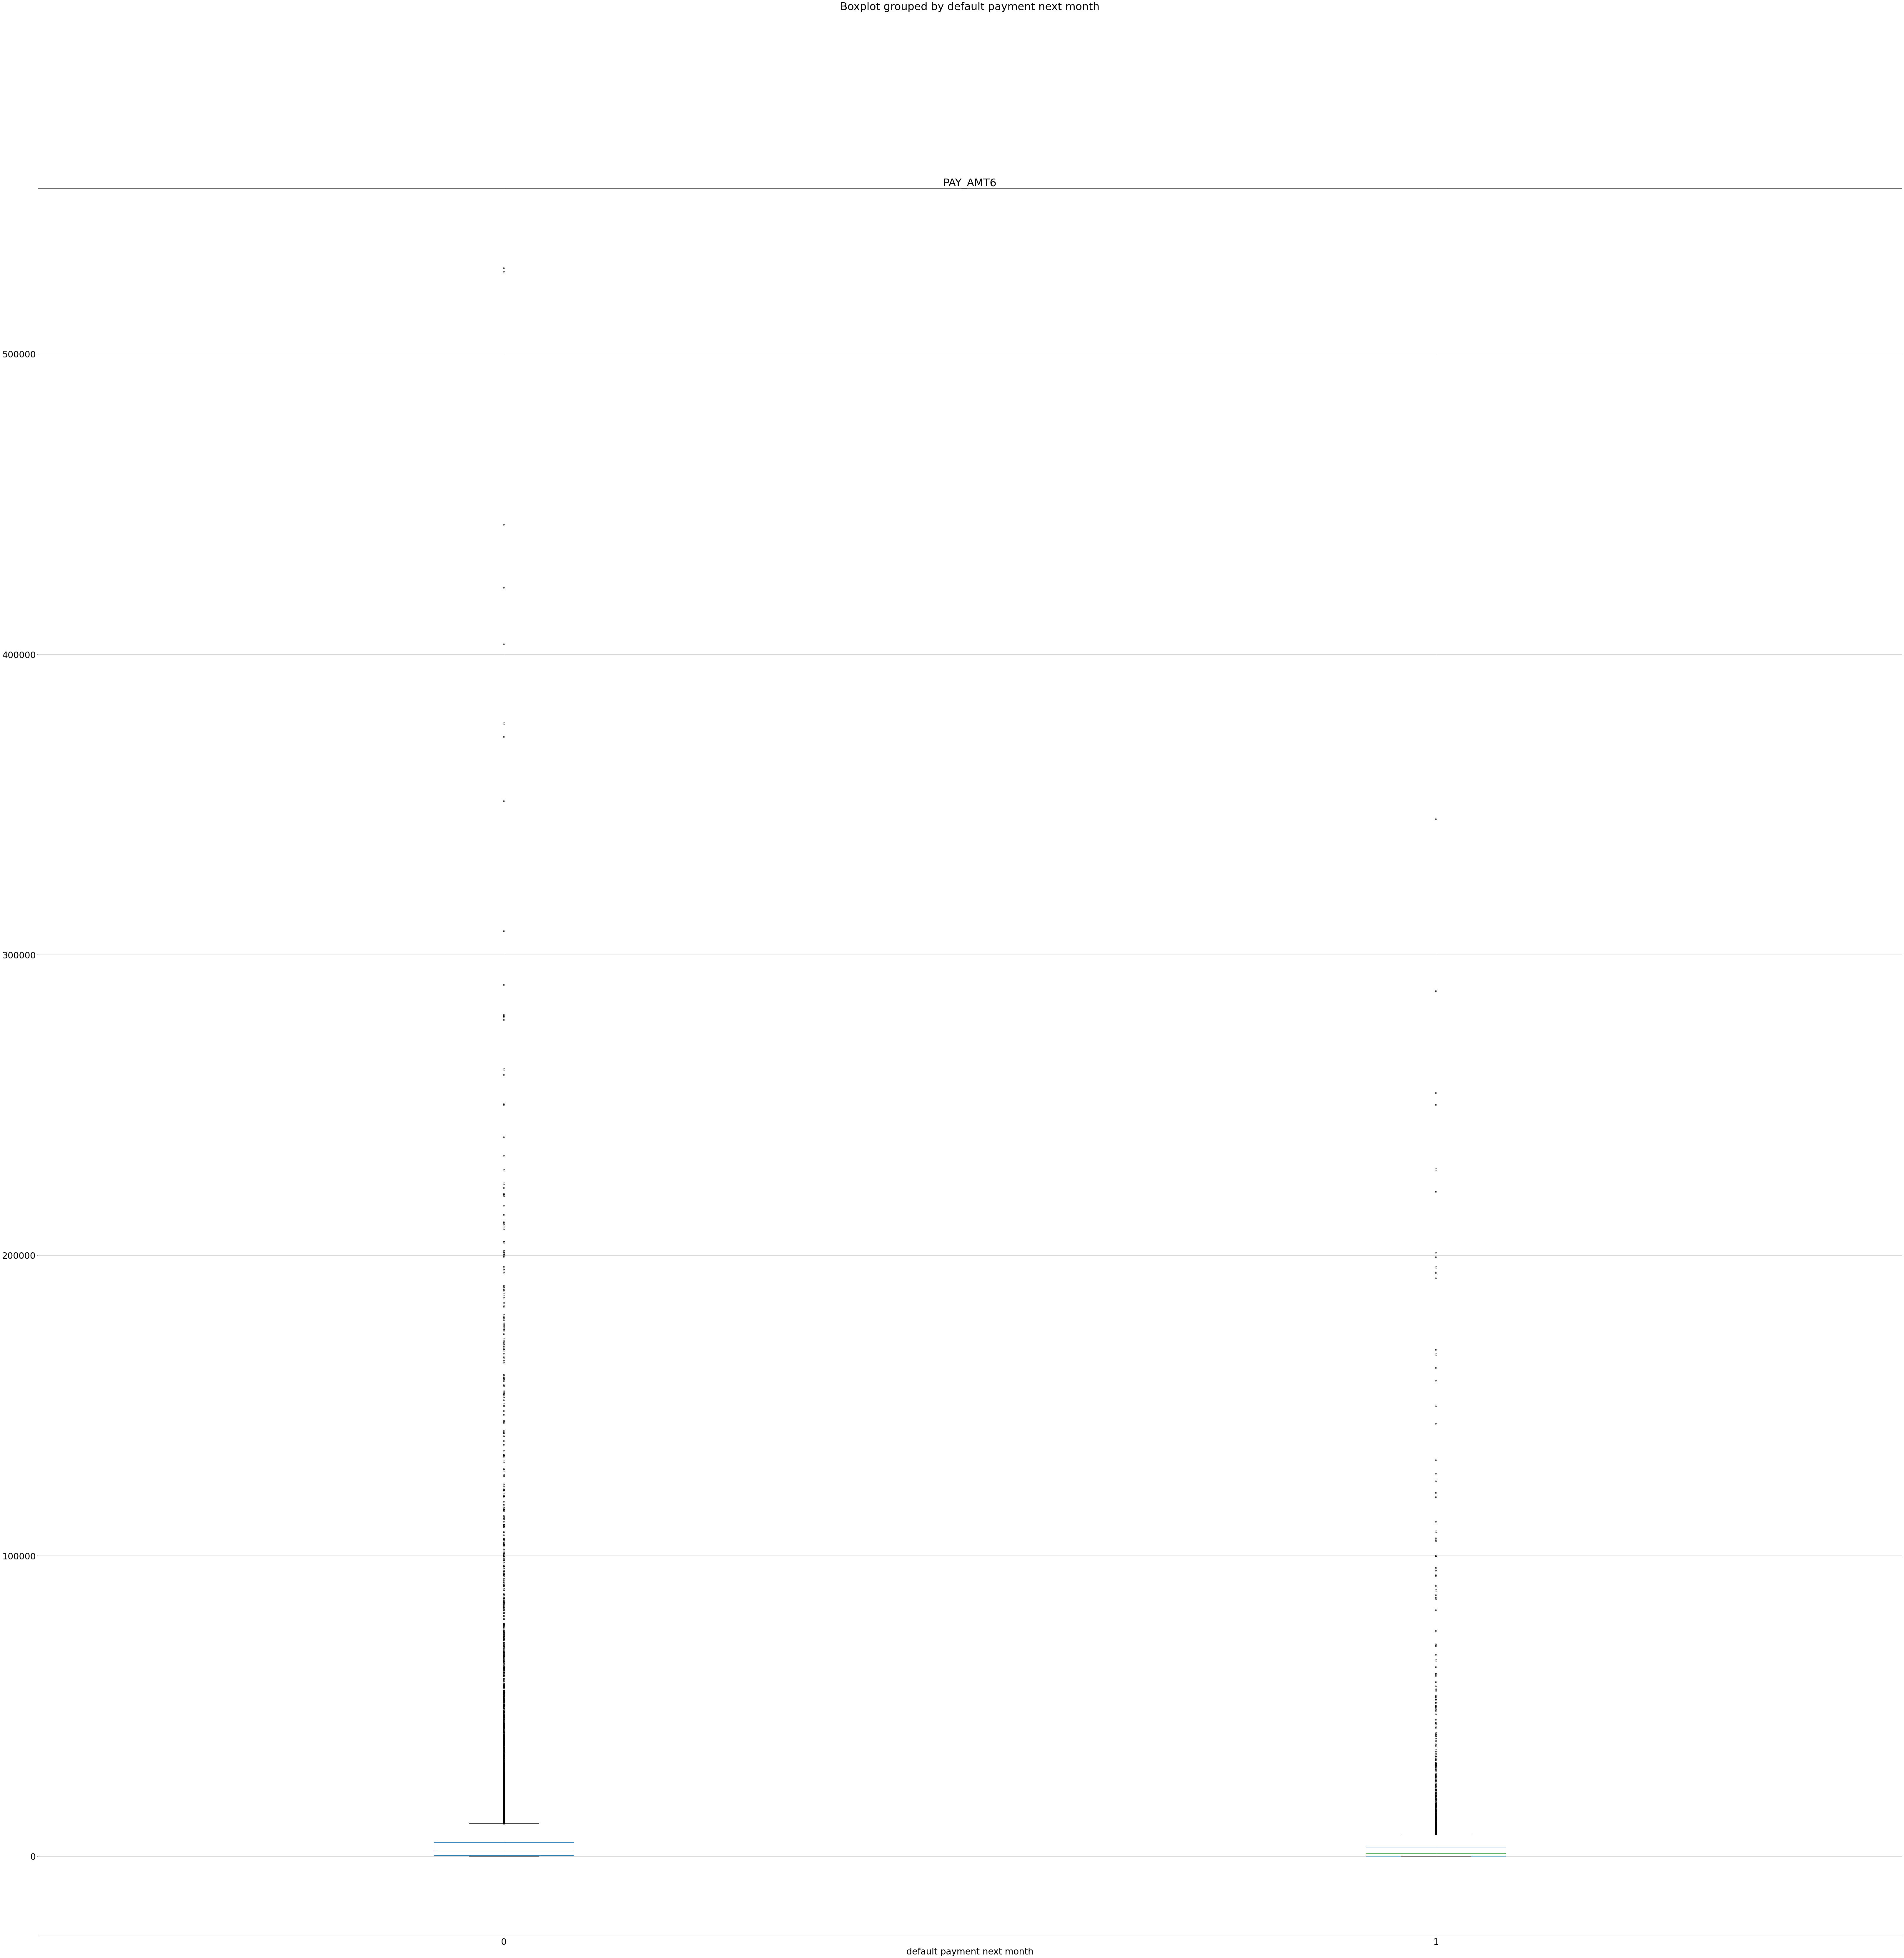

In [180]:
vars_to_plot_separate = [['BILL_AMT1'],['PAY_AMT6']]
for index, plot_vars in enumerate(vars_to_plot_separate):
    ax = bank_db_df.boxplot(column=plot_vars,by='default payment next month')
plt.show()

Both Box Plots are above show a large amount of data outside the Quartiers for these two catagories. These box plots were indictive of how our data was distributed in relation to our preditor variable. This could indicate that theres are a large amount outliers and below we had a exploaration of the outcome of identifiying the outliers and removing them from our data. 

In [176]:
q_low = bank_db_df["PAY_0"].quantile(0.01)
q_hi  = bank_db_df["PAY_0"].quantile(0.99)

df_filtered = bank_db_df[(bank_db_df["BILL_AMT1"] <= q_hi) & (bank_db_df["BILL_AMT1"] >= q_low)]


q_low = df_filtered["PAY_2"].quantile(0.01)
q_hi  = df_filtered["PAY_2"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT1"] <= q_hi) & (df_filtered["BILL_AMT1"] >= q_low)]


q_low = df_filtered["PAY_3"].quantile(0.01)
q_hi  = df_filtered["PAY_3"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT1"] <= q_hi) & (df_filtered["BILL_AMT1"] >= q_low)]


q_low = df_filtered["PAY_4"].quantile(0.01)
q_hi  = df_filtered["PAY_4"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT1"] <= q_hi) & (df_filtered["BILL_AMT1"] >= q_low)]


q_low = df_filtered["PAY_5"].quantile(0.01)
q_hi  = df_filtered["PAY_5"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT1"] <= q_hi) & (df_filtered["BILL_AMT1"] >= q_low)]


q_low = df_filtered["PAY_6"].quantile(0.01)
q_hi  = df_filtered["PAY_6"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT1"] <= q_hi) & (df_filtered["BILL_AMT1"] >= q_low)]


q_low = df_filtered["BILL_AMT1"].quantile(0.01)
q_hi  = df_filtered["BILL_AMT1"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT1"] <= q_hi) & (df_filtered["BILL_AMT1"] >= q_low)]


q_low = df_filtered["BILL_AMT2"].quantile(0.01)
q_hi  = df_filtered["BILL_AMT2"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT2"] <= q_hi) & (df_filtered["BILL_AMT2"] >= q_low)]

q_low = df_filtered["BILL_AMT3"].quantile(0.01)
q_hi  = df_filtered["BILL_AMT3"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT3"] <= q_hi) & (df_filtered["BILL_AMT3"] >= q_low)]

q_low = df_filtered["BILL_AMT4"].quantile(0.01)
q_hi  = df_filtered["BILL_AMT4"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT4"] <= q_hi) & (df_filtered["BILL_AMT4"] >= q_low)]

q_low = df_filtered["BILL_AMT5"].quantile(0.01)
q_hi  = df_filtered["BILL_AMT5"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT5"] <= q_hi) & (df_filtered["BILL_AMT5"] >= q_low)]

q_low = df_filtered["BILL_AMT6"].quantile(0.01)
q_hi  = df_filtered["BILL_AMT6"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["BILL_AMT6"] <= q_hi) & (df_filtered["BILL_AMT6"] >= q_low)]


q_low = df_filtered["PAY_AMT1"].quantile(0.01)
q_hi  = df_filtered["PAY_AMT1"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["PAY_AMT1"] <= q_hi) & (df_filtered["PAY_AMT1"] >= q_low)]


q_low = df_filtered["PAY_AMT2"].quantile(0.01)
q_hi  = df_filtered["PAY_AMT2"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["PAY_AMT2"] <= q_hi) & (df_filtered["PAY_AMT2"] >= q_low)]

q_low = df_filtered["PAY_AMT3"].quantile(0.01)
q_hi  = df_filtered["PAY_AMT3"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["PAY_AMT3"] <= q_hi) & (df_filtered["PAY_AMT3"] >= q_low)]

q_low = df_filtered["PAY_AMT4"].quantile(0.01)
q_hi  = df_filtered["PAY_AMT4"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["PAY_AMT4"] <= q_hi) & (df_filtered["PAY_AMT4"] >= q_low)]

q_low = df_filtered["PAY_AMT5"].quantile(0.01)
q_hi  = df_filtered["PAY_AMT5"].quantile(0.99)

df_filtered = bank_db_df[(bank_db_df["PAY_AMT5"] <= q_hi) & (bank_db_df["PAY_AMT5"] >= q_low)]

q_low = df_filtered["PAY_AMT6"].quantile(0.01)
q_hi  = df_filtered["PAY_AMT6"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["PAY_AMT6"] <= q_hi) & (df_filtered["PAY_AMT6"] >= q_low)]

corr = bank_db_df[bank_db_df.columns[1:]].corr()['default payment next month'][:]
corr

corr2 = df_filtered[df_filtered.columns[1:]].corr()['default payment next month'][:]
corr2
print('Number of Possible Outliers')
print(bank_db_df['default payment next month'].count() - df_filtered['default payment next month'].count())
print('-----')
print('')
print('Without removing all possible outliers')
print(corr)
print('')
print('Number of rows')
print(bank_db_df['default payment next month'].count())
print('-----')
print('')
print('Removing all possible outliers')
print(corr2)
print('')
print('Number of rows')
print(df_filtered['default payment next month'].count())
print('-----')


Number of Possible Outliers
6888
-----

Without removing all possible outliers
LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next mon

Outliers: Of the 30,000 rows of data we identified 6888 possible outliers that could be driving our data. We took the data and experimented by removing the outliers from the data and to see what our correlation would display when comparing to our predicted variable of default payment next month. When removed the correlations droped for the vast majority of variables. With this being displayed we decided not to remove the variables from our data set since they were a postive driving force for our correlations.  

# New Features

We created new features from the existing categories of Gender, Education and Marital Status. These were created by using the numaric catagorical varaible that was assigned and concating them together to create the new features for our data set. These new features concisted of the groupings displayed below:  

Gender/Education/Marital Status

Gender/Education

Gender/Marital Status

Education/Marital Status

For Example if I had a Female who went to University and was married would be numarical value would be 221.


We tried this approach to see if we could provide more dimensionality to these categorical variables so that we could use them to show a higher correlation to our preditive variable of default payments each month. 

Also we created new columns for average pay amounts and average bill amounts. We did this again to see if we could create a stronger correlation to our perdictor variable since there was a weak correlation already to our preditive variable. 

Unfortunately both results were not highly correlated to our predictive variable.  Further feature creation might be necessary to try to drive higher correlationsso that we might have a more accurate predictive model.    